In [125]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

In [126]:
# load the images using the URLs in the JSON file. These are for the rock-2.png labelled image.
vein_type_1_binary_mask = imageio.imread("https://imagemasks.s3.amazonaws.com/1d054cf569422959ddedd052/cjg2zgjwa5nps01679m9q77ii_Vein_Type_1_mask.png")
vein_type_2_binary_mask = imageio.imread("https://imagemasks.s3.amazonaws.com/1d054cf569422959ddedd052/cjg2zgjwa5nps01679m9q77ii_Vein_Type_2_mask.png")
vein_type_3_binary_mask = imageio.imread("https://imagemasks.s3.amazonaws.com/1d054cf569422959ddedd052/cjg2zgjwa5nps01679m9q77ii_Vein_Type_3_mask.png")

In [127]:
vein_type_1_colour = np.array([0,255,0])     # green
vein_type_2_colour = np.array([0,0,255])     # blue
vein_type_3_colour = np.array([255,127,80])  # orange

In [128]:
vein_type_3_binary_mask.shape

(354, 958)

In [129]:
# convert from 2D grayscale image to 2D multichannel (RGB)
vein_type_1_3ch_mask = np.stack((vein_type_1_binary_mask,)*3, -1)
vein_type_2_3ch_mask = np.stack((vein_type_2_binary_mask,)*3, -1)
vein_type_3_3ch_mask = np.stack((vein_type_3_binary_mask,)*3, -1)

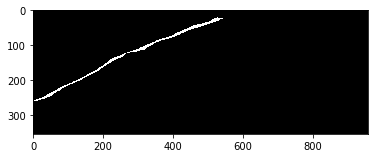

In [130]:
plt.imshow(vein_type_1_3ch_mask)

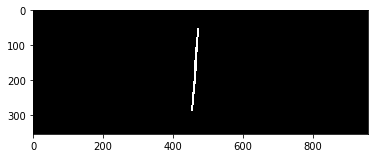

In [131]:
plt.imshow(vein_type_2_3ch_mask)

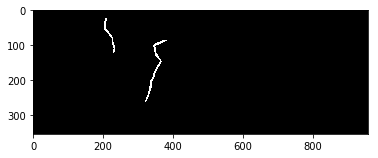

In [132]:
plt.imshow(vein_type_3_3ch_mask)

In [133]:
# find where the pixels are white - doesn't matter which channel we look in, as they are identical
vein_1_rows, vein_1_cols = np.where(vein_type_1_3ch_mask[:,:,1]==255)
vein_2_rows, vein_2_cols = np.where(vein_type_2_3ch_mask[:,:,1]==255)
vein_3_rows, vein_3_cols = np.where(vein_type_3_3ch_mask[:,:,1]==255)

In [134]:
# ... and set those pixels to the colour for that object class
vein_type_1_3ch_mask[vein_1_rows,vein_1_cols,:] = vein_type_1_colour
vein_type_2_3ch_mask[vein_2_rows,vein_2_cols,:] = vein_type_2_colour
vein_type_3_3ch_mask[vein_3_rows,vein_3_cols,:] = vein_type_3_colour

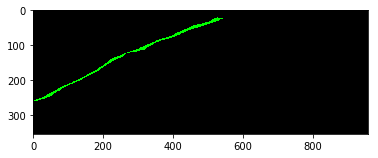

In [135]:
plt.imshow(vein_type_1_3ch_mask)

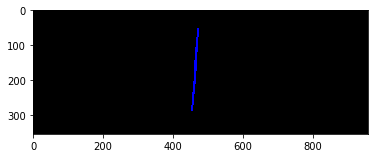

In [136]:
plt.imshow(vein_type_2_3ch_mask)

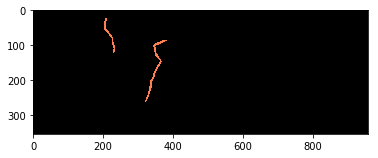

In [137]:
plt.imshow(vein_type_3_3ch_mask)

In [138]:
combined_im = vein_type_1_3ch_mask+vein_type_2_3ch_mask+vein_type_3_3ch_mask

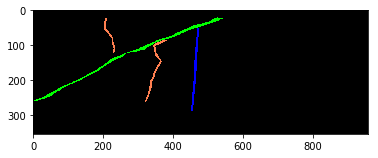

In [139]:
plt.imshow(combined_im)

In [140]:
imageio.imwrite('instance-mask.png', combined_im)